# Image Classification using `sklearn.svm`

### Importing Necessary packages

In [3]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, metrics
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray
from sklearn import metrics
from sklearn.decomposition import PCA


### Load images in structured directory

In [4]:
def load_image_files(container_path, dimension=(64, 64)):

    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A Braille image classification dataset"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = imread(file)
            imgray= rgb2gray(img)
            img_resized = resize(imgray, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [5]:
image_dataset = load_image_files("images/")
print(image_dataset)

{'data': array([[0.9999999 , 0.99999991, 0.99999999, ..., 1.        , 1.        ,
        1.        ],
       [0.9999999 , 0.99999991, 0.99999999, ..., 1.        , 1.        ,
        1.        ],
       [0.99999961, 0.9993145 , 0.98961962, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.99607833, 0.99607834, 0.99607842, ..., 0.98609374, 0.9947122 ,
        0.99312949],
       [0.96862755, 0.96932341, 0.98892229, ..., 1.        , 1.        ,
        1.        ],
       [0.96862755, 0.96932341, 0.98892229, ..., 1.        , 1.        ,
        1.        ]]), 'target': array([ 0,  0,  0, ..., 27, 27, 27]), 'target_names': ['A', 'B', 'C', 'D', 'E', 'F', 'Fullstop', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'semicolon', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], 'images': array([[[0.9999999 , 0.99999991, 0.99999999, ..., 0.99829159,
         0.99998814, 1.        ],
        [0.99969468, 0.99971844, 0.99996404, ..., 0.99842457,
         0.99998906, 1. 

### Split data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target, test_size=0.2,random_state=1)

print(image_dataset.target_names)

['A', 'B', 'C', 'D', 'E', 'F', 'Fullstop', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'semicolon', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


### Train data with parameter optimization

In [7]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': ['auto'], 'kernel': ['rbf']},
  {'C': [1, 10, 100, 1000], 'kernel': ['poly']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
print(X_train)
X_test = sc.transform(X_test)
print(X_test)

# Determine transformed features
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

[[-0.98543278 -0.99072941 -1.10593909 ... -1.13837729 -1.13609145
  -1.13547228]
 [ 0.67904019  0.67973521  0.68500101 ...  0.62235356  0.61817662
   0.61784371]
 [ 0.58583043  0.58752574  0.60424086 ...  0.62235356  0.61817662
   0.61784371]
 ...
 [ 0.67903854  0.67249673  0.46196835 ...  0.62235356  0.61817662
   0.61784371]
 [ 0.53256701  0.53453531  0.56904488 ...  0.60870448  0.60457764
   0.60425211]
 [ 0.57251466  0.57449862  0.60864798 ...  0.50399179  0.53183316
   0.52607352]]
[[ 0.572514    0.5755311   0.64771113 ...  0.43172292  0.56207146
   0.56856333]
 [ 0.63909155  0.63744369  0.61045543 ...  0.61640728  0.61813549
   0.61784371]
 [ 0.572514    0.57553112  0.64771103 ...  0.62235356  0.61817662
   0.61784371]
 ...
 [ 0.67903953  0.67973455  0.68500036 ...  0.62235356  0.61817662
   0.61784371]
 [-0.91885358 -0.92111225 -0.9340524  ... -1.02918468 -1.02729963
  -1.0267395 ]
 [ 0.67903953  0.67766089  0.6617089  ...  0.62235356  0.61817662
   0.61784371]]


In [9]:
clf.fit(X_train_pca, y_train)

### Predict

In [10]:
print(y_test)
y_pred = clf.predict(X_test_pca)
print(y_pred)

[19  2 25  9 13 16 24  4  7  9 18 15  4 21 19  9 24 22 10 18  8 17  1 13
  8 23  4 23 13  2  4  7 24  1 25  1 21 16  5 25 24 20 15  0 22 25  7 11
  7 20 26  9 18 23 20 26  7 13 11  5 27 15 21 15  0 17 21 24 12 25 23 13
  9  2  3 24  7 12  3 15 11 13  8 11 12 19 16  8 22 12 18  2  2 19  6  1
 16 18 14 23 22  7 17  6 25 17  3 19  0  4 10  8 26  9  5 23 24 24 12 21
 11 24  5  8 11 24 10  2 25 14 18 16 23 10 13 27 12 10 13  9  1 19 19  4
  0  7 17 11 17 10 24 12 13 16  5 23 18 15 26  1  0  0 18  4 21  6 13 10
 22  8 21  2 13  9 26 20  5 17 24  9  0  8 19 23  5 12  0  1  4 15 10  6
  7  2  5 27 19 10 13  4 27 22  5 15  1 20 19 11 26  3  5 15 16 27 23 11
 27 19 24 18 23 12 16 18 23 26  5 21 26 15 17 11 12 26  9 20 18 23  7  1
  2 10  2 23  1 10 18 27 17 13 13 25 19  3 14 22 20  8  8  3  4  9 22 16
 25 14  8 11 18  7  6  7  3  3 24  2  7 26  0 23  8 16 17  7 11 27  6  3
 15 26 15 27  0 16 13  0  7 16 19  2 21 12 19  3 14  9 12  1 23  9 15  4
 16 15 11 25 21 12  8  5  2 19  8 25 22 26 16 17 13

In [11]:
acc_svm = print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average="weighted"))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average="weighted"))

print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Accuracy: 0.95662100456621
Precision: 0.9593238984506107
Recall: 0.95662100456621
Classification report for - 
GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': ['auto'],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['poly']}]):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.87      1.00      0.93        13
           2       0.94      0.94      0.94        17
           3       0.92      1.00      0.96        12
           4       1.00      0.94      0.97        18
           5       1.00      0.94      0.97        16
           6       1.00      1.00      1.00         8
           7       1.00      0.95      0.98        22
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        19


In [18]:
cm_svm = print(metrics.confusion_matrix(y_test, y_pred))

[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 1 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1 18  0  0  0  0  0  0  0  0  0  0  1  0  0
   0  0  0  0]
 [ 1  0  0  0  0  0  

### Training Random Forest model

In [18]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=200, oob_score= False, random_state=42,min_samples_leaf=5)
model.fit(X_train_pca, y_train)
y_pred_rf=model.predict(X_test_pca)

In [19]:
acc_rf = print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_rf, average="weighted"))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_rf, average="weighted"))

print("Classification report for - \n{}:\n{}\n".format(
    model, metrics.classification_report(y_test, y_pred_rf)))

Accuracy: 0.9018264840182648
Precision: 0.917121737944557
Recall: 0.9018264840182648
Classification report for - 
RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       random_state=42):
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       0.67      0.92      0.77        13
           2       0.84      0.94      0.89        17
           3       0.71      0.83      0.77        12
           4       0.76      0.89      0.82        18
           5       1.00      0.94      0.97        16
           6       1.00      1.00      1.00         8
           7       0.95      0.86      0.90        22
           8       0.95      0.95      0.95        19
           9       1.00      0.84      0.91        19
          10       1.00      1.00      1.00        16
          11       0.92      0.73      0.81        15
          12       0.85      0.89      0.87        19
          13 

### Report

In [13]:
cm_rf = print(metrics.confusion_matrix(y_test, y_pred_rf))

[[12  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 1 12  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 2  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  0]
 [ 2  0  0  0  0  1  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  2  0  0  1  0 14  0  0  0  0  0  0  1  0  0  0  0  0  0
   2  0  0  0]
 [ 1  0  0  0  0  1  

### Training KNN model

In [56]:
from sklearn.neighbors import KNeighborsClassifier 
classifier= KNeighborsClassifier(n_neighbors=3, weights = "uniform",metric='minkowski', p=1)  
classifier.fit(X_train_pca, y_train)
y_pred_knn= classifier.predict(X_test_pca) 

In [52]:
from sklearn import metrics
acc_knn = print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_knn, average="weighted"))

Accuracy: 0.7420091324200914
Precision: 0.7964655766831431


In [16]:
cm_knn = print(metrics.confusion_matrix(y_test, y_pred_knn))

[[12  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 4 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0 14  2  1  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  4  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 1  0  0  0 19  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  2  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0
   0  0  0  0]
 [ 0  0  2  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 2  1  0  0  0  1  0  0  8  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 2  0  0  0  0  1  0  0  0 15  2  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  2  0  0  1  3 14  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 8  0  0  0  0  0  

### Accuracy of the three Models

In [53]:
acc_svm = print("Accuracy of Support vector machine:",metrics.accuracy_score(y_test, y_pred))
acc_rf = print("Accuracy of Randam Forest:",metrics.accuracy_score(y_test, y_pred_rf))
acc_knn = print("Accuracy of K-Nearest neighbor:",metrics.accuracy_score(y_test, y_pred_knn))

Accuracy of Support vector machine: 0.95662100456621
Accuracy of Randam Forest: 0.9018264840182648
Accuracy of K-Nearest neighbor: 0.7420091324200914


### Comparison of Accuracy scores of the Three models

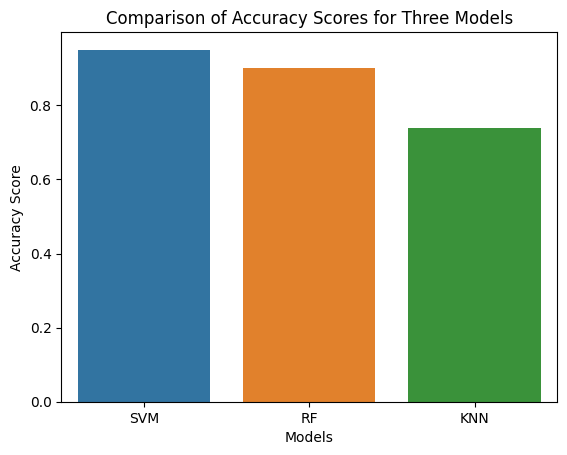

In [54]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
models = ['SVM', 'RF', 'KNN']
accuracy_scores = [0.95, 0.90, 0.74]
sns.barplot(x=models, y=accuracy_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy Scores for Three Models')
plt.show()
